In [5]:
import numpy as np
import pandas as pd
import urllib
import seaborn as sns; sns.set()
%matplotlib inline


In [6]:
## Reading a csv with pandas

data = pd.read_csv("data/mpg.csv") 

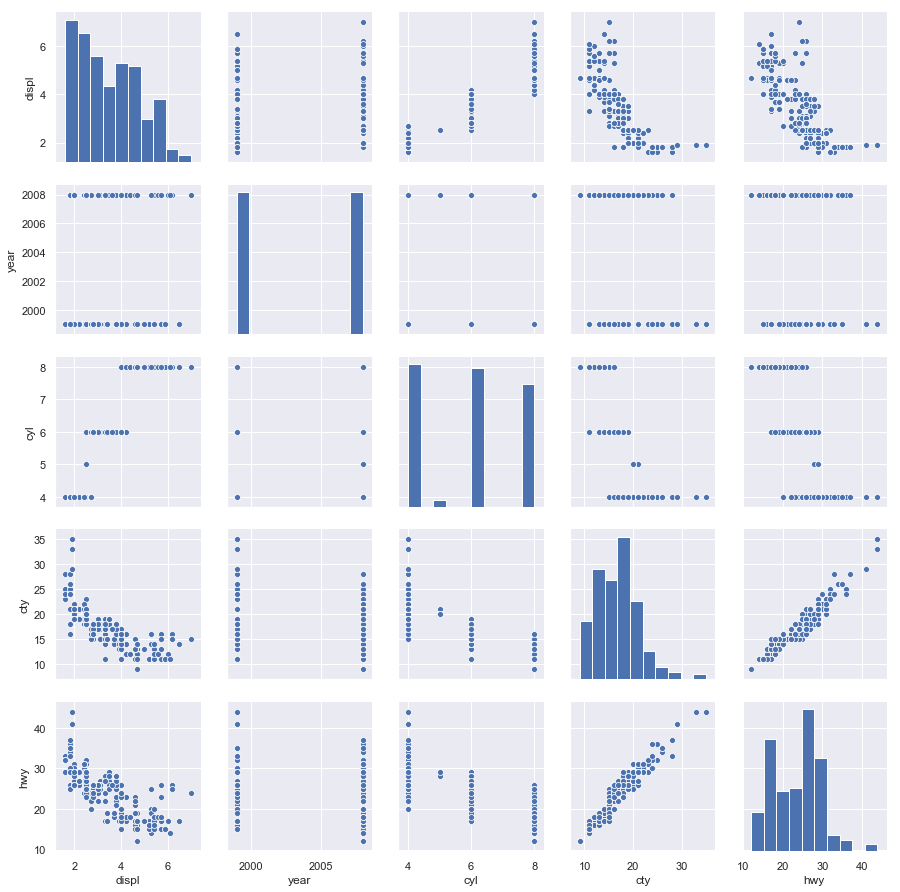

In [85]:
# plot for exploratory visualization
sns.pairplot(data)

In [7]:
features_data = data.drop(['cty', 'hwy'], axis=1)

In [8]:
# converting a column to numeric
features_data_vectorized = features_data.copy() 

trans_set = set(features_data_vectorized['trans'].values)
trans_mapping = {}
for idx, val in enumerate(list(trans_set)):
    trans_mapping[val] = idx + 1
features_data_vectorized['trans'] = [trans_mapping[item] for item in features_data_vectorized['trans']] 

features_data_vectorized.head()

,manufacturer,model,displ,year,cyl,trans,drv,fl,class
0,audi,a4,1.8,1999,4,2,f,p,compact
1,audi,a4,1.8,1999,4,8,f,p,compact
2,audi,a4,2.0,2008,4,1,f,p,compact
3,audi,a4,2.0,2008,4,10,f,p,compact
4,audi,a4,2.8,1999,6,2,f,p,compact


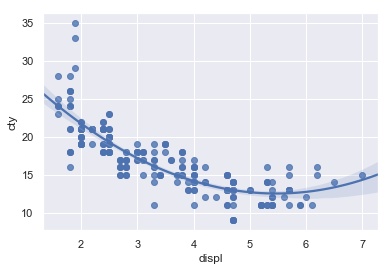

In [9]:
# Fit a model with displ and year as input features
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(features_data[['displ', 'year']], data['cty'])

sns.regplot(x="displ", y="cty", order=2, data=data)

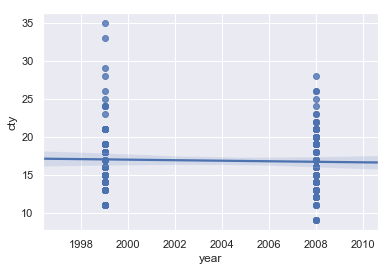

In [160]:
sns.regplot(x="year", y="cty", data=data)

In [119]:
model.coef_


array([-2.67072418,  0.07798129])

In [120]:
model.intercept_

-130.10433402918295

In [126]:
# linear regression to predict two cty mpg data points with displacement and year
model.predict([[2.0, 2007], [1.8, 2019]])

array([21.06266703, 22.53258735])